In [1]:
import datetime

from time import sleep
from math import sin, cos, tan, pi
import os

deg2rad = pi / 180

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from xpcclient.simutils import *
from xpcclient.normalization import DF_Nomalize, denorm, _norm

INTERVAL = 0.05

2023-05-10 07:33:27.761866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
nn_dir = os.path.join('xpcclient', 'Eval', 'neuralnet')
ap_dir = os.path.join('xpcclient', 'Eval', 'autopilot')

nn_file = os.path.join(nn_dir, 'rec_5.csv')
ap_file = os.path.join(ap_dir, 'rec_15.csv')

nn_df = pd.read_csv(nn_file)
ap_df = pd.read_csv(ap_file)

if not os.path.exists('figs'):
    os.mkdir('figs')

In [3]:
last_ind = nn_df.shape[0]-1
nn_df.loc[last_ind, 'ias']

try:
    empty_index = nn_df.loc[nn_df['h_err']>35].index

    nn_df.loc[empty_index, 'hralt'] = np.nan
    nn_df.loc[empty_index, 'h_err'] = np.nan
    ap_df.loc[empty_index, 'gs_dev_deg'] = np.nan
except:
    pass

try:
    empty_index = ap_df.loc[ap_df['h_err']>25].index[0]

    ap_df.loc[empty_index, 'hralt'] = np.nan
    ap_df.loc[empty_index, 'h_err'] = np.nan
    ap_df.loc[empty_index, 'gs_dev_deg'] = np.nan
except:
    pass

ap_df.interpolate(inplace=True)
ap_df.interpolate(inplace=True)

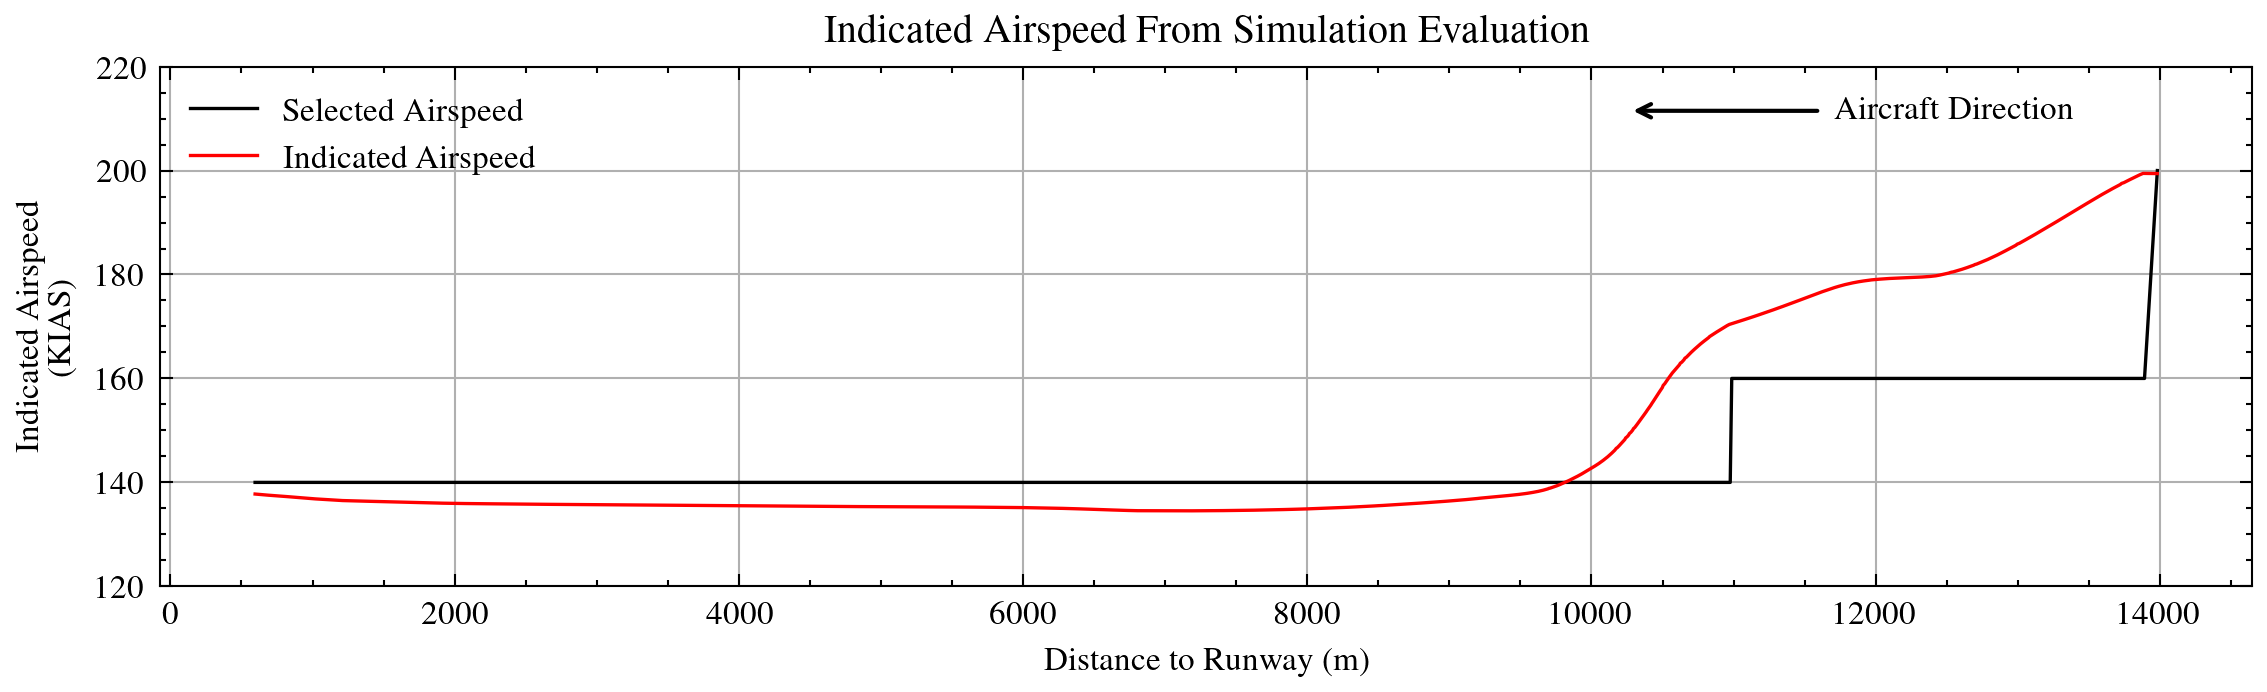

In [4]:
plt.style.use(['science', 'ieee'])

fig = plt.figure(figsize=(6*1.5, 1.5*1.5), dpi=300)

plt.plot(nn_df['dist_m'], nn_df['sas'], alpha=1, color='k', linestyle='-', linewidth=0.8)
plt.plot(nn_df['dist_m'], nn_df['ias'], alpha=1, color='r', linestyle='-', linewidth=0.8)
    
ax = plt.gca()
ax.annotate('Aircraft Direction', xy=(0.7, 0.915), xycoords='axes fraction', xytext=(0.8, 0.9), 
            arrowprops=dict(arrowstyle="->", color='k'))

plt.xlabel('Distance to Runway (m)')
plt.ylabel('Indicated Airspeed\n(KIAS)')
plt.title('Indicated Airspeed From Simulation Evaluation')
plt.ylim((120, 220))
plt.grid()
plt.legend(['Selected Airspeed', 'Indicated Airspeed'])
plt.show()
fig.savefig('figs/ch4_nn_ias.png')
fig.savefig('figs/ch4_nn_ias.pdf')

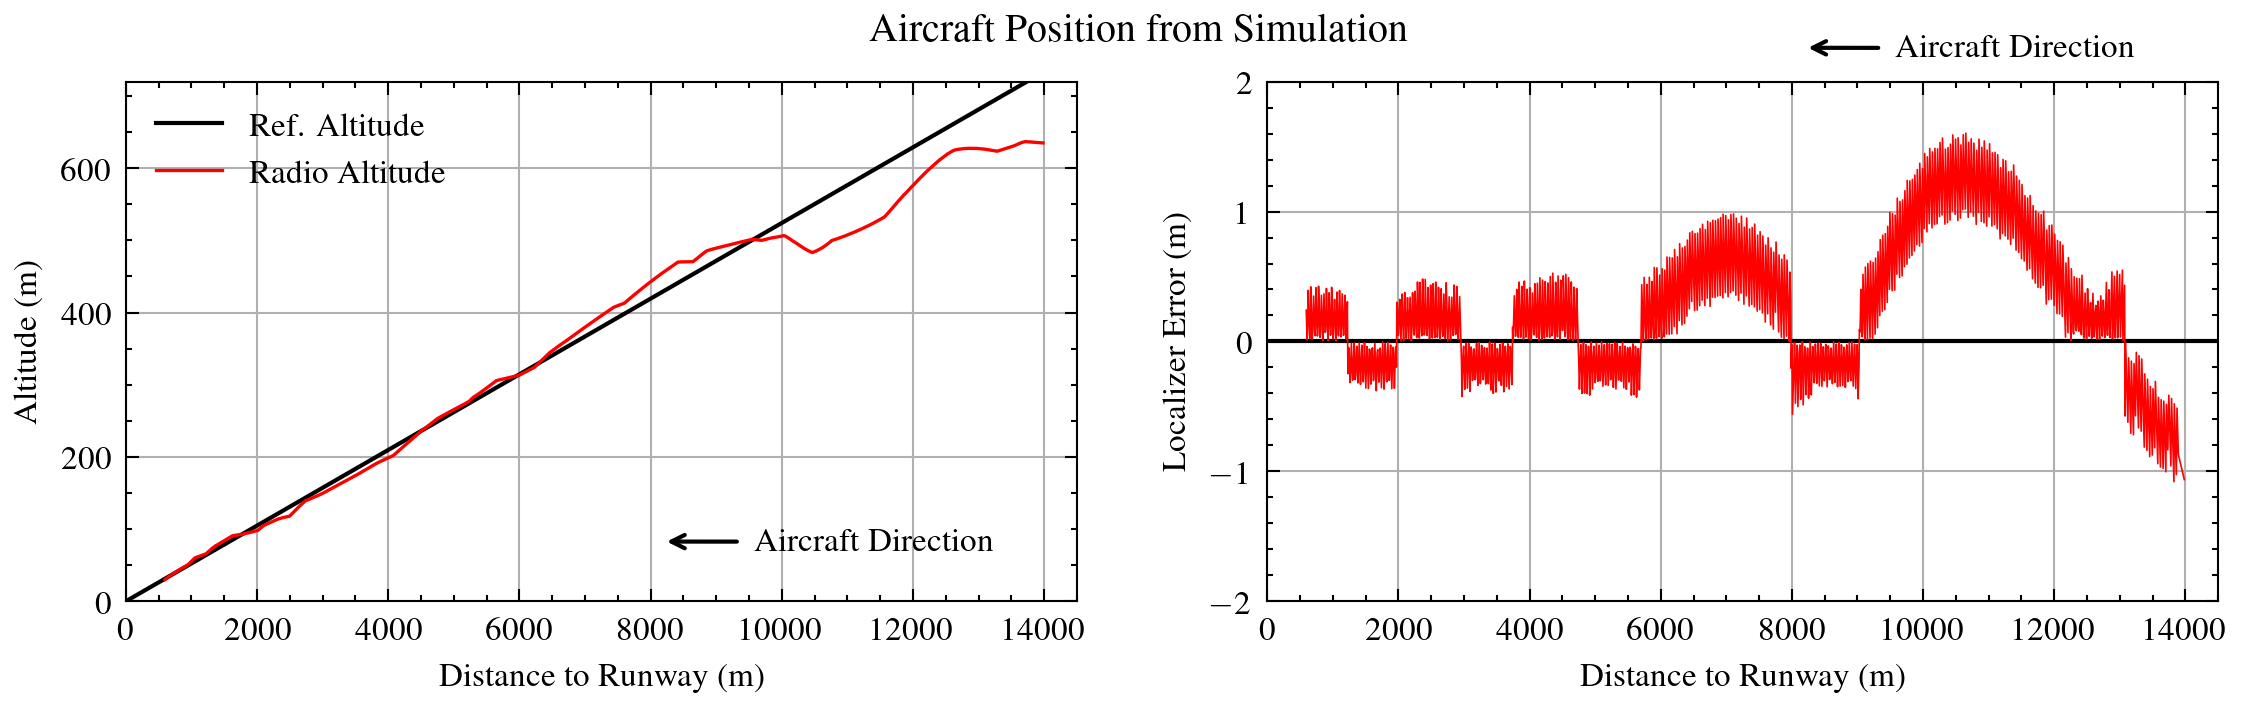

In [5]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6*1.5, 1.5*1.5)
fig.set_dpi(300)


axs[0].plot((0, 15000), (0, 15000*tan(3*deg2rad)), alpha=1, color='k', linestyle='-', linewidth=1)
axs[0].plot(nn_df['dist_m'], nn_df['hralt'], alpha=1, color='r', linestyle='-', linewidth=0.8)

axs[1].plot((0, 15000), (0, 0), alpha=1, color='k', linestyle='-', linewidth=1)
axs[1].plot(nn_df['dist_m'], nn_df['loc_m'], alpha=1, color='r', linestyle='-', linewidth=0.4)

axs[0].legend(['Ref. Altitude', 'Radio Altitude'])

an_x = 0.56
an_y = 0.1
axs[0].annotate('Aircraft Direction', xy=(an_x, an_y+0.015), xycoords='axes fraction', xytext=(an_x+0.1, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

an_x = 0.56
an_y = 1.05
axs[1].annotate('Aircraft Direction', xy=(an_x, an_y+0.015), xycoords='axes fraction', xytext=(an_x+0.1, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

axs[0].set_xlabel('Distance to Runway (m)')
axs[1].set_xlabel('Distance to Runway (m)')
axs[0].set_ylabel('Altitude (m)')
axs[1].set_ylabel('Localizer Error (m)')
fig.suptitle('Aircraft Position from Simulation')
#plt.ylim((120, 220))
axs[0].set_ylim((0, 720))
axs[1].set_ylim((-2, 2))
axs[0].set_xlim((0, 14500))
axs[1].set_xlim((0, 14500))
axs[0].grid()
axs[1].grid()
plt.show()
fig.savefig('figs/ch4_nn_position.png', dpi=300)
fig.savefig('figs/ch4_nn_position.pdf')

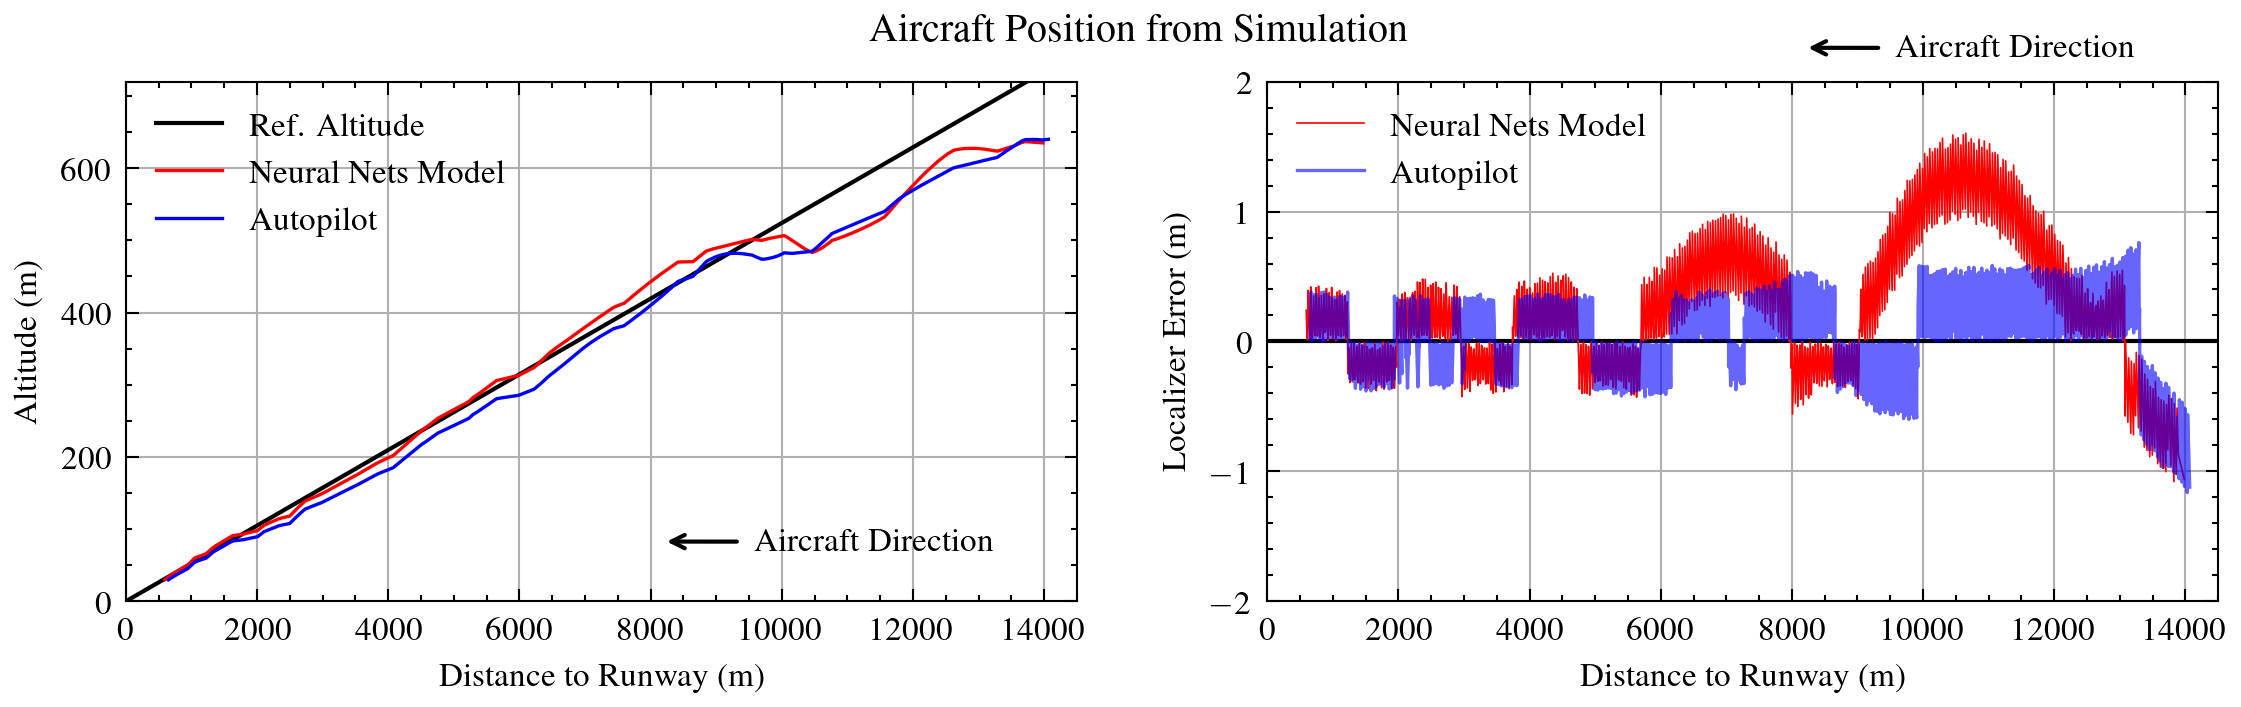

In [6]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(6*1.5, 1.5*1.5)
fig.set_dpi(300)


axs[0].plot((0, 15000), (0, 15000*tan(3*deg2rad)), alpha=1, color='k', linestyle='-', linewidth=1)
axs[0].plot(nn_df['dist_m'], nn_df['hralt'], alpha=1, color='r', linestyle='-', linewidth=0.8)
axs[0].plot(ap_df['dist_m'], ap_df['hralt'], alpha=1, color='b', linestyle='-', linewidth=0.8)

axs[1].plot((0, 15000), (0, 0), alpha=1, color='k', linestyle='-', linewidth=1)
axs[1].plot(nn_df['dist_m'], nn_df['loc_m'], alpha=1, color='r', linestyle='-', linewidth=0.4, label='Neural Nets Model')
axs[1].plot(ap_df['dist_m'], ap_df['loc_m'], alpha=0.6, color='b', linestyle='-', linewidth=0.8, label='Autopilot')

axs[0].legend(['Ref. Altitude', 'Neural Nets Model', 'Autopilot'])
axs[1].legend()

an_x = 0.56
an_y = 0.1
axs[0].annotate('Aircraft Direction', xy=(an_x, an_y+0.015), xycoords='axes fraction', xytext=(an_x+0.1, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

an_x = 0.56
an_y = 1.05
axs[1].annotate('Aircraft Direction', xy=(an_x, an_y+0.015), xycoords='axes fraction', xytext=(an_x+0.1, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

axs[0].set_xlabel('Distance to Runway (m)')
axs[1].set_xlabel('Distance to Runway (m)')
axs[0].set_ylabel('Altitude (m)')
axs[1].set_ylabel('Localizer Error (m)')
fig.suptitle('Aircraft Position from Simulation')
#plt.ylim((120, 220))
axs[0].set_ylim((0, 720))
axs[1].set_ylim((-2, 2))
axs[0].set_xlim((0, 14500))
axs[1].set_xlim((0, 14500))
axs[0].grid()
axs[1].grid()
plt.show()
fig.savefig('figs/ch4_position_comp.png', dpi=300)
fig.savefig('figs/ch4_position_comp.pdf')

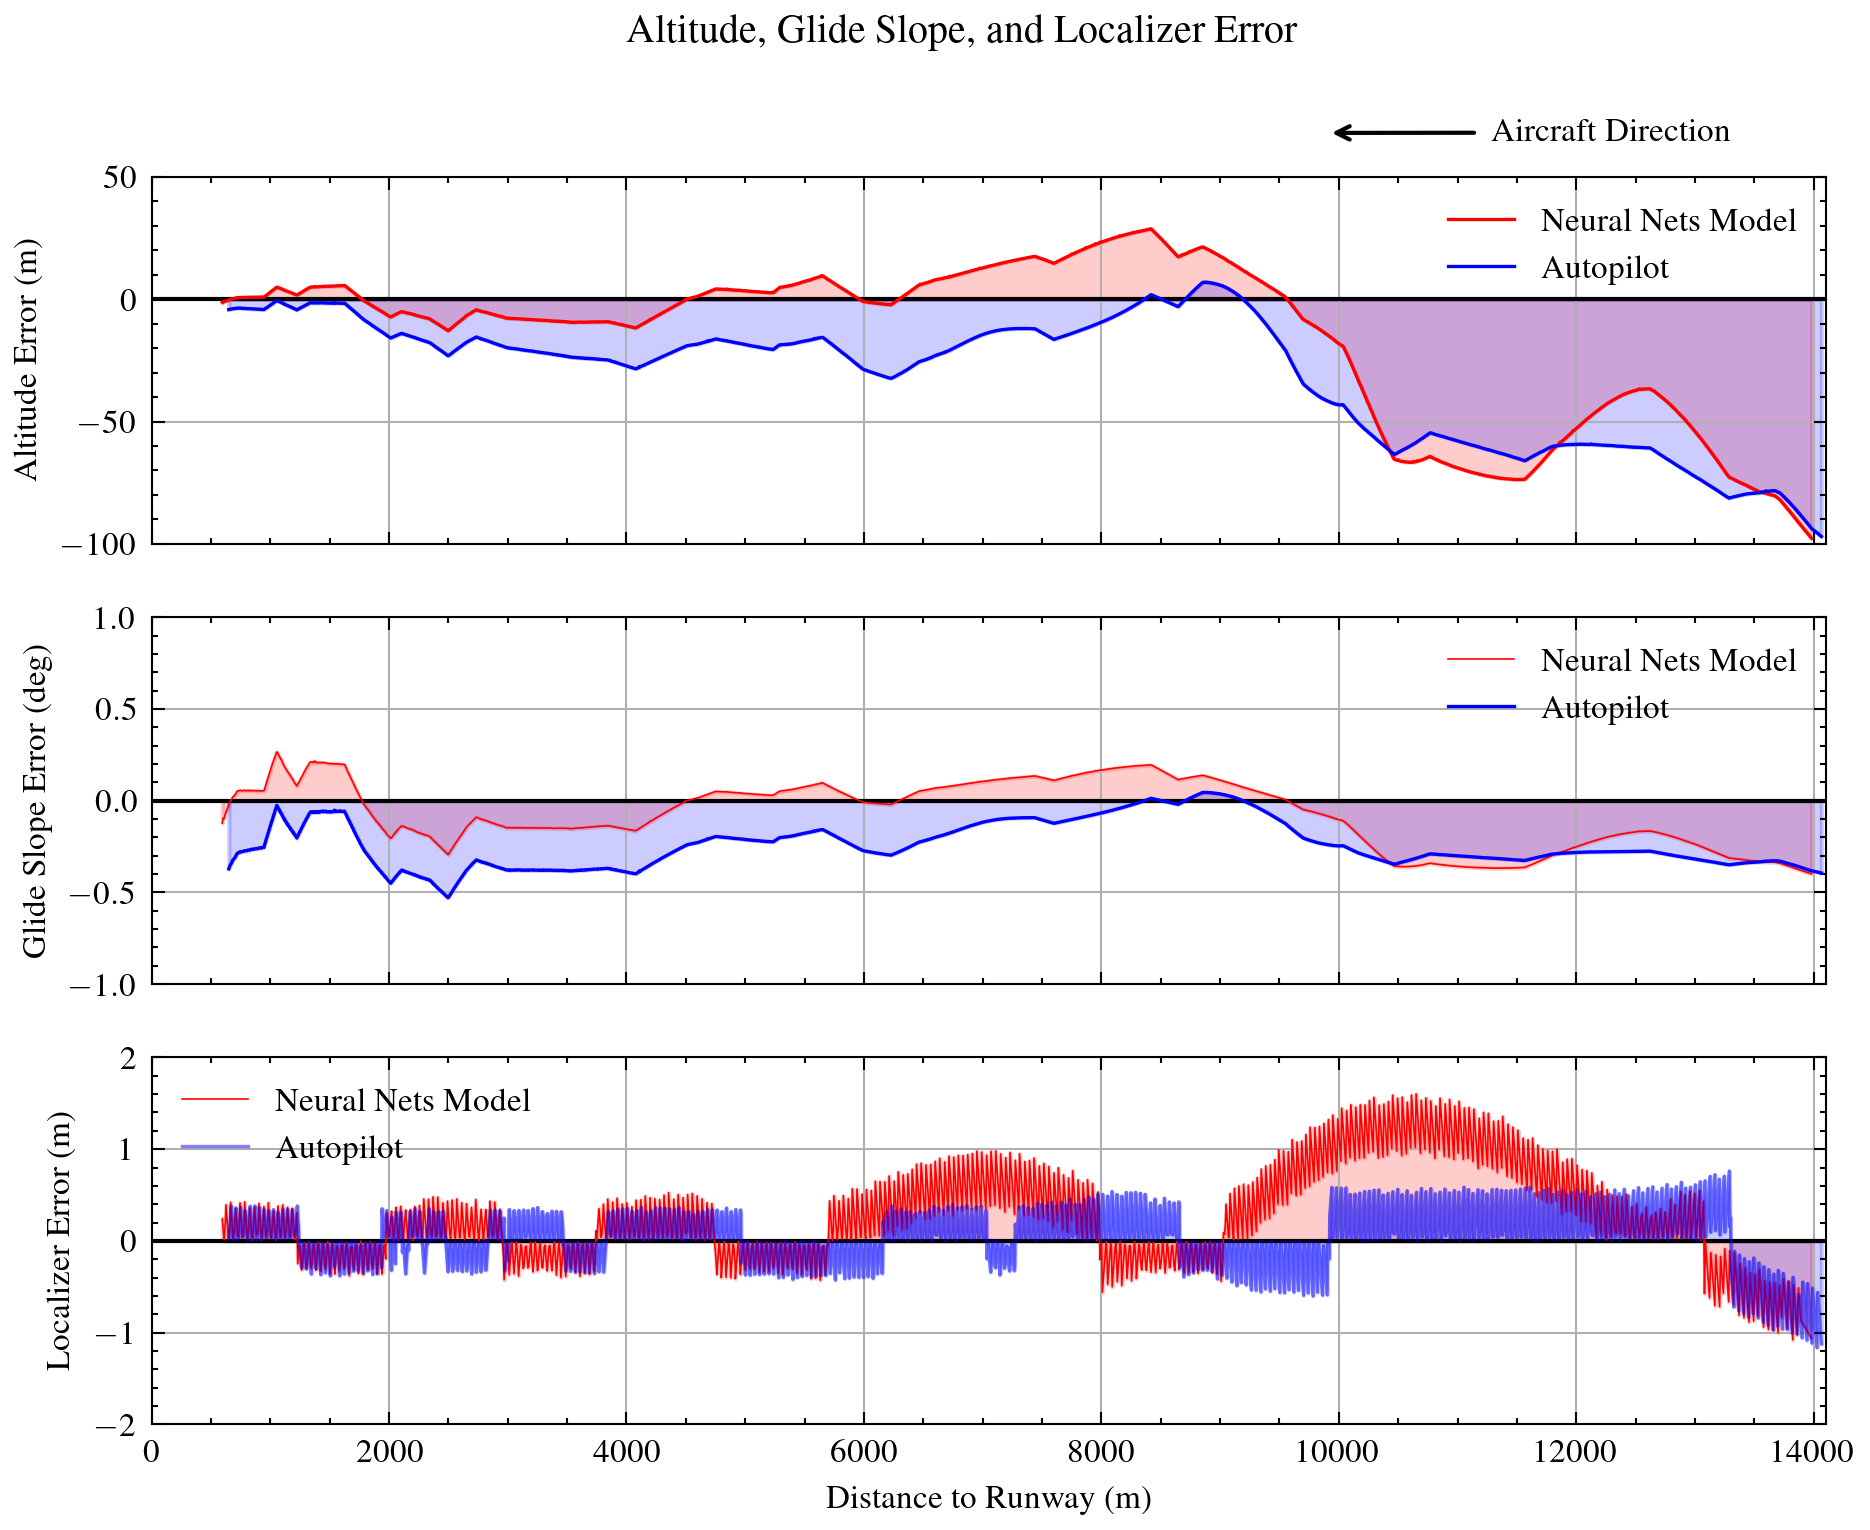

In [7]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(6*1.2, 3*1.2*1.5)
fig.set_dpi(300)

axs[0].plot((0, 15000), (0, 0), alpha=1, color='k', linestyle='-', linewidth=1)
axs[0].plot(nn_df['dist_m'], nn_df['h_err'], alpha=1, color='r', linestyle='-', linewidth=0.8, label='Neural Nets Model')
axs[0].plot(ap_df['dist_m'], ap_df['h_err'], alpha=1, color='b', linestyle='-', linewidth=0.8, label='Autopilot')
axs[0].fill_between(x=nn_df['dist_m'], y1=nn_df['h_err'],
            color='r', alpha=0.2)
axs[0].fill_between(x=ap_df['dist_m'], y1=ap_df['h_err'],
            color='b', alpha=0.2)

axs[1].plot((0, 15000), (0, 0), alpha=1, color='k', linestyle='-', linewidth=1)
axs[1].plot(nn_df['dist_m'], nn_df['gs_dev_deg'], alpha=1, color='r', linestyle='-', linewidth=0.4, label='Neural Nets Model')
axs[1].plot(ap_df['dist_m'], ap_df['gs_dev_deg'], alpha=1, color='b', linestyle='-', linewidth=0.8, label='Autopilot')
axs[1].fill_between(x=nn_df['dist_m'], y1=nn_df['gs_dev_deg'],
            color='r', alpha=0.2)
axs[1].fill_between(x=ap_df['dist_m'], y1=ap_df['gs_dev_deg'],
            color='b', alpha=0.2)

axs[2].plot((0, 15000), (0, 0), alpha=1, color='k', linestyle='-', linewidth=1)
axs[2].plot(nn_df['dist_m'], nn_df['loc_m'], alpha=1, color='r', linestyle='-', linewidth=0.4, label='Neural Nets Model')
axs[2].plot(ap_df['dist_m'], ap_df['loc_m'], alpha=0.5, color='b', linestyle='-', linewidth=0.8, label='Autopilot')
axs[2].fill_between(x=nn_df['dist_m'], y1=nn_df['loc_m'],
            color='r', alpha=0.2)
axs[2].fill_between(x=ap_df['dist_m'], y1=ap_df['loc_m'],
            color='b', alpha=0.2)


an_x = 0.7
an_y = 1.1
axs[0].annotate('Aircraft Direction', xy=(an_x, an_y+0.02), xycoords='axes fraction', xytext=(an_x+0.1, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
axs[2].set_xlabel('Distance to Runway (m)')
axs[0].set_ylabel('Altitude Error (m)')
axs[1].set_ylabel('Glide Slope Error (deg)')
axs[2].set_ylabel('Localizer Error (m)')
fig.suptitle('Altitude, Glide Slope, and Localizer Error')

axs[0].set_ylim((-100, 50))
axs[1].set_ylim((-1, 1))
axs[2].set_ylim((-2, 2))

axs[0].set_xlim((0, 14100))
axs[1].set_xlim((0, 14100))
axs[2].set_xlim((0, 14100))
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()
fig.savefig('figs/ch4_gs_loc_comp.png', dpi=300)
fig.savefig('figs/ch4_gs_loc_comp.pdf')


In [8]:
table_dict = {}
table_dict['Mean Absolute of'] = ['Altitude Error (m)', 'Glide Slope (deg)', 'Localizer Error(m)']
table_dict['Neural Network Model'] = [
    np.average (abs(nn_df['h_err'])),
    np.average (abs(nn_df['gs_dev_deg'])),
    np.average (abs(nn_df['loc_m']))
]
table_dict['Autopilot'] = [
    np.average (abs(ap_df['h_err'])),
    np.average (abs(ap_df['gs_dev_deg'])),
    np.average (abs(ap_df['loc_m']))
]


table_df = pd.DataFrame(table_dict)

In [9]:
table_df

,Mean Absolute of,Neural Network Model,Autopilot
0,Altitude Error (m),21.009850,28.589715
1,Glide Slope (deg),0.149212,0.241406
2,Localizer Error(m),0.416704,0.224630


/tmp/ipykernel_60294/1942789715.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


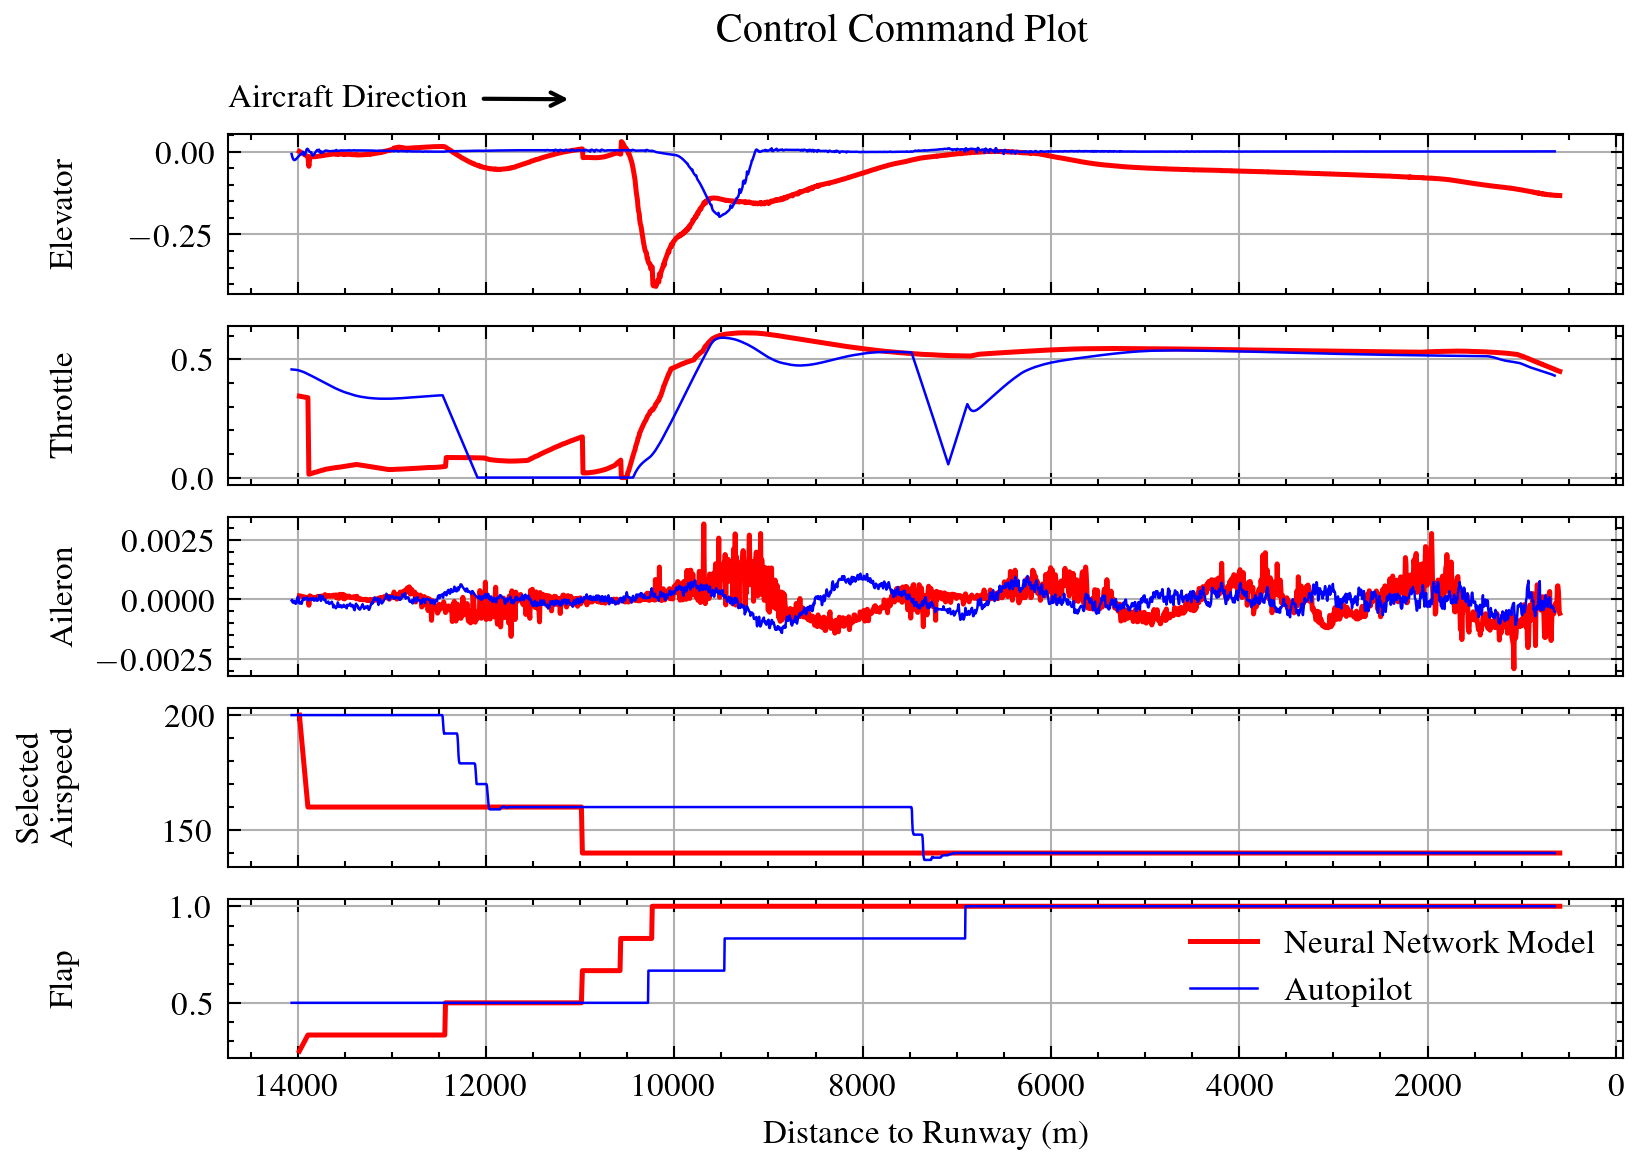

In [11]:
from math import floor
import random

LABEL_LIST = ['ctrl_col', 'throttle', 'ctrl_whl', 'sas', 'flap_rat']
LABEL_NAME = ['Elevator', 'Throttle', 'Aileron', 'Selected\nAirspeed', 'Flap']

fig, axs = plt.subplots(5, 1)

prediction_tuples = []
largest_length = 0
label_tuple = ()
for k, label in enumerate(LABEL_LIST):

    axs[k].plot(nn_df['dist_m'], nn_df[label], color='r', linestyle='-', linewidth=1.2)
    axs[k].plot(ap_df['dist_m'], ap_df[label], color='b', linestyle='-', linewidth=0.6)

    axs[k].set_ylabel(LABEL_NAME[k])
    axs[k].grid()
    axs[k].invert_xaxis()

    if k != 4:
        axs[k].set_xticklabels([])
    else:
        axs[k].legend(['Neural Network Model', 'Autopilot'])

axs[4].set_xlabel('Distance to Runway (m)')

an_x = 0.0
an_y = 1.18
axs[0].annotate('Aircraft Direction', xy=(an_x+0.25, an_y+0.04), xycoords='axes fraction', xytext=(an_x, an_y), 
            arrowprops=dict(arrowstyle="->", color='k'))

fig.align_ylabels(axs[:])
fig.set_size_inches(6, 1*4)
fig.set_dpi(300)
fig.suptitle("Control Command Plot")

fig.savefig('figs/ch4_sim_command.png', dpi=300)
fig.savefig('figs/ch4_sim_command.pdf')
fig.show()